## Homework 8

date: 11/04/2017
author: Ralf Banisch

implementation of Gillespie's algorithm is from Higham2008, references:

Simple implementation of the Stochastic Simulation Algorithm (or Gillespie?s algorithm) on the Michaelis-Menten system.

Parameters from Chapter 7 of Stochastic Modelling for Systems Biology, by Darren J. Wilkinson, Chapman & Hall/CRC, 2006.

Downloadable from http://www.maths.strath.ac.uk/aas96106/algfiles.html along with an extended version that produces graphical output.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
# stoichiometric matrix
V = np.asarray([[-1, 1, 0], [-1, 1, 1], [1, -1, -1], [0, 0, 1]]);
print(V)

[[-1  1  0]
 [-1  1  1]
 [ 1 -1 -1]
 [ 0  0  1]]


In [151]:
nA = 6.023e23;                            # Avagadro's number
vol = 1e-15;                              # volume of system
c = np.asarray([1e6/(nA*vol), 1e-4, 0.1]) # reaction rates
a = np.asarray([0.0, 0.0, 0.0]) # stoichiometric vector
print(c)
tfinal = 50;

[ 0.0016603  0.0001     0.1      ]


## medium amount of molecules

In [152]:
# initial conditions
X = np.zeros(4);
X[0] = round(5e-7*nA*vol); # molecules of substrate
X[1] = round(2e-7*nA*vol); # molecules of enzyme
t = 0;

X_record = X.reshape(4,1);
t_record = t;
    
# the actual algorithm
while t < tfinal:
    a[0] = c[0]*X[0]*X[1];
    a[1] = c[1]*X[2];
    a[2] = c[2]*X[2];
    asum = np.sum(a);
    j = np.min(np.where(np.random.rand() < np.cumsum(a/asum)));
    tau = - np.log(np.random.random())/ asum
    #Record system state (the intermediate state is for  plotting)
    X_record = np.append(X_record, X.reshape(4,1), axis=1);
    X_record = np.append(X_record, np.reshape(X + V[:, j], [4,1]), axis=1);
    t_record = np.append(t_record, [t + tau, t + tau]);
    #update system state
    X = X + V[:,j];
    t = t + tau;

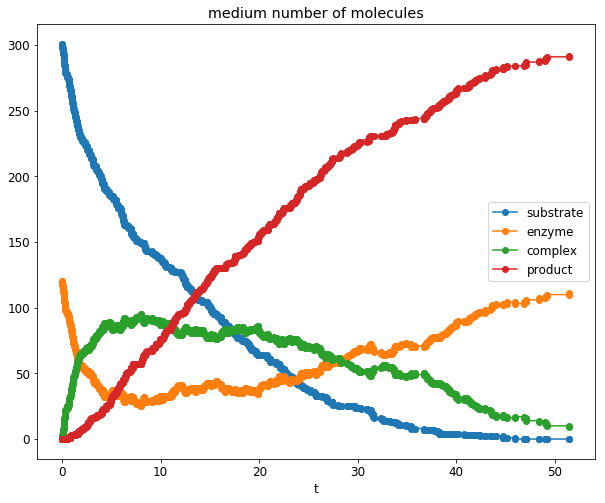

In [153]:
# plotting
plt.figure(figsize=(10, 8))
plt.plot(t_record,X_record.transpose(),'o-');
plt.rcParams.update({'font.size': 12})
plt.xlabel('t')
plt.title('medium number of molecules')
plt.legend(['substrate','enzyme','complex','product'])

## Small amount of molecules

In [154]:
# initial conditions
X = np.zeros(4);
X[0] = round(5e-8*nA*vol); # molecules of substrate
X[1] = round(2e-8*nA*vol); # molecules of enzyme
t = 0;

X_record = X.reshape(4,1);
t_record = t;
    
# the actual algorithm
while t < tfinal:
    a[0] = c[0]*X[0]*X[1];
    a[1] = c[1]*X[2];
    a[2] = c[2]*X[2];
    asum = np.sum(a);
    j = np.min(np.where(np.random.rand() < np.cumsum(a/asum)));
    tau = - np.log(np.random.random())/ asum
    #Record system state (the intermediate state is for  plotting)
    X_record = np.append(X_record, X.reshape(4,1), axis=1);
    X_record = np.append(X_record, np.reshape(X + V[:, j], [4,1]), axis=1);
    t_record = np.append(t_record, [t + tau, t + tau]);
    #update system state
    X = X + V[:,j];
    t = t + tau;

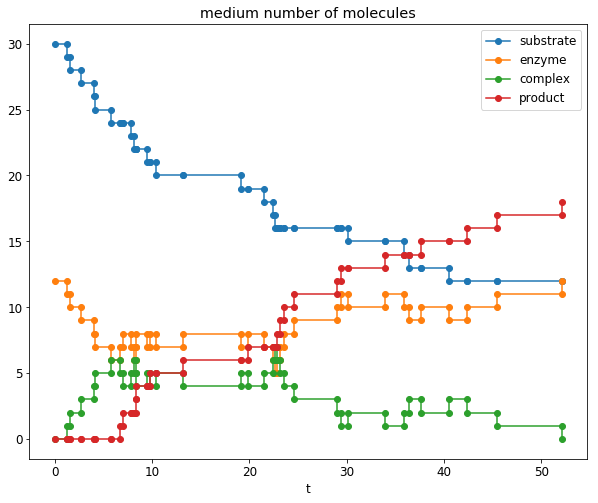

In [155]:
# plotting
plt.figure(figsize=(10, 8))
plt.plot(t_record,X_record.transpose(),'o-');
plt.rcParams.update({'font.size': 12})
plt.xlabel('t')
plt.title('medium number of molecules')
plt.legend(['substrate','enzyme','complex','product'])

## Large amount of molecules

In [159]:
# initial conditions
X = np.zeros(4);
X[0] = round(5e-6*nA*vol); # molecules of substrate
X[1] = round(2e-6*nA*vol); # molecules of enzyme
t = 0;

X_record = X.reshape(4,1);
t_record = t;
    
# the actual algorithm
while t < tfinal:
    a[0] = c[0]*X[0]*X[1];
    a[1] = c[1]*X[2];
    a[2] = c[2]*X[2];
    asum = np.sum(a);
    j = np.min(np.where(np.random.rand() < np.cumsum(a/asum)));
    tau = - np.log(np.random.random())/ asum
    #Record system state (the intermediate state is for  plotting)
    X_record = np.append(X_record, X.reshape(4,1), axis=1);
    X_record = np.append(X_record, np.reshape(X + V[:, j], [4,1]), axis=1);
    t_record = np.append(t_record, [t + tau, t + tau]);
    #update system state
    X = X + V[:,j];
    t = t + tau;

yeah!
yeah!
yeah!
yeah!


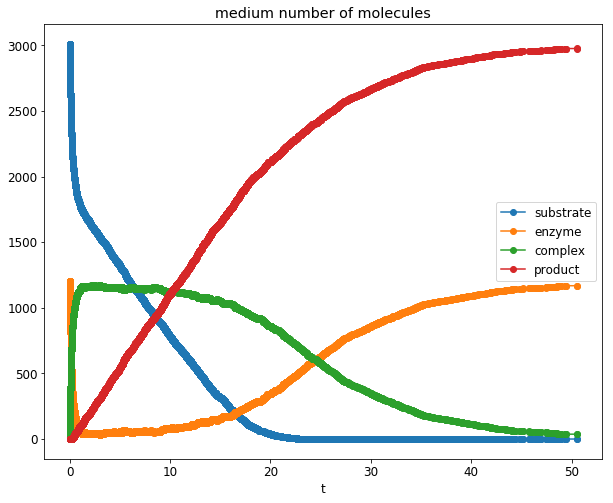

In [157]:
# plotting
plt.figure(figsize=(10, 8))
plt.plot(t_record,X_record.transpose(),'o-');
plt.rcParams.update({'font.size': 12})
plt.xlabel('t')
plt.title('medium number of molecules')
plt.legend(['substrate','enzyme','complex','product'])